In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation

In [33]:
L=5
mu=0.3
# 3,0.3
D = np.diag([L,mu])
t=-1
P = np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]])
M = P @ D @ P.T
x = np.array([1,1])
b = - M@x
c = 0.5 * b.T @ np.linalg.inv(M) @ b + 0.7
print(f'The eigenvalues of M are {D[0,0]} and {D[1,1]}.')

def f(x):
    return 0.5 * x.T @ M @ x + b.T @ x + c

The eigenvalues of M are 5.0 and 0.3.


$$\Large
f(x) = \frac{1}{2} x^T M x + \langle x,b \rangle + c.
$$

$$
$$


$$\Large
\nabla f(x) = M x + b, \qquad \qquad H_f(x) = M.
$$

In [34]:
x1=np.arange(-2,4, 0.005)
X1, X2 = np.meshgrid(x1, x1)
Z = 0.5 * M[0,0]*X1*X1 + 0.5*M[1,1]*X2*X2 + M[0,1]*X1*X2 + b[0]*X1 + b[1]*X2 + c

In [35]:
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'

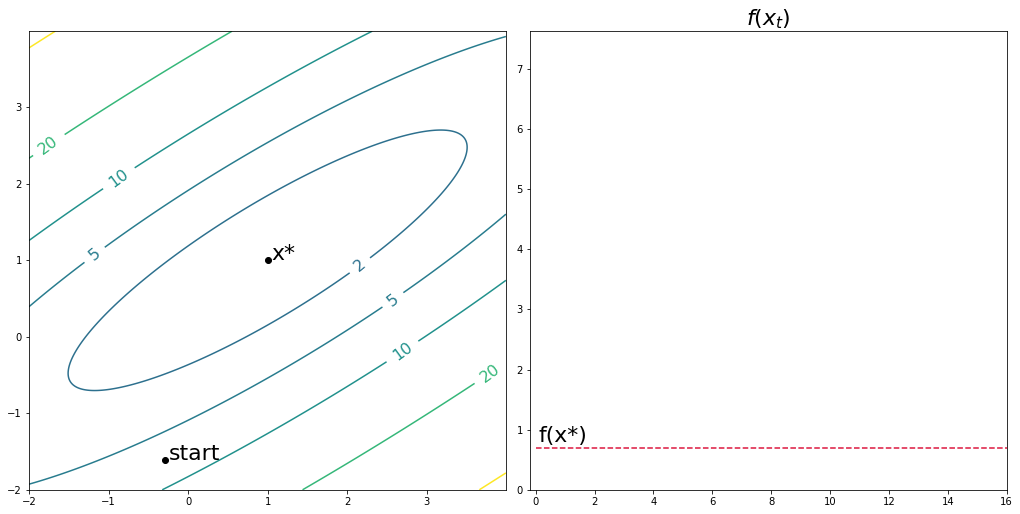

In [36]:
fig=plt.figure(figsize=(14,7))

ax = plt.subplot(1,2,1) 
levels = np.array([-20,-10,-5,-1,2,5,10,20,40])
levels = np.sort(levels)
CS=plt.contour(X1,X2,Z,levels)

plt.scatter(x[0],x[1], color='black')
plt.annotate('x*',(x[0]+0.05,x[1]),fontsize=22, color='black')

start = x + 1.5* P[:,0] + -2.5* P[:,1]

plt.scatter(start[0],start[1], color='black')
point, = ax.plot([],[],marker='o',color='crimson',linewidth=2)
plt.annotate('start',(start[0]+0.05,start[1]),fontsize=22, color='black')

txt_title = ax.set_title('', fontsize=22)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=16)

ax2 = plt.subplot(1,2,2)

error_line, = ax2.plot([],[],marker='o',color='navy')
plt.hlines(f(x),0,16, color='crimson', linestyle='--')
ax2.set_title(r'$f(x_t)$', fontsize=22)
plt.annotate('f(x*)',(0.1,0.8),fontsize=22)

ax2.set_xlim(-0.2,16)
ax2.set_ylim(0,1.05*f(start))

fig.subplots_adjust(left=0.02, bottom=0.04, right=0.99, top=0.95, wspace=0.05, hspace=None)

In [37]:
def gradient(x):
    return M @ x + b

In [52]:
# GRADIENT DESCENT
N=16
time = np.array(range(N))
position = np.copy(start)
trajectory = np.zeros(shape=(2,N))
error = np.zeros(N)
alpha = 1/L

alpha = 4 / np.square(np.sqrt(L) + np.sqrt(mu))

for i in range(N):
    trajectory[:,i] = position
    error[i] = f(position)
    
    position = position - alpha * gradient(position)

In [53]:
def drawframe(n):
    point.set_data(trajectory[0,:n+1],trajectory[1,:n+1])
    error_line.set_data(time[:n+1], error[:n+1])
    txt_title.set_text(f'Iteration {n}')
    return point, error_line

In [54]:
anim = animation.FuncAnimation(fig, drawframe, frames=N, interval=600, blit=True)
HTML(anim.to_html5_video())

In [50]:
# GRADIENT DESCENT WITH MOMENTUM

N=16
time = np.array(range(N))
position = np.copy(start)
trajectory = np.zeros(shape=(2,N))
error = np.zeros(N)

v = np.zeros(2)

alpha = 1/L
beta = 0.6


alpha = 4 / np.square(np.sqrt(L) + np.sqrt(mu))
beta = np.square((np.sqrt(L)-np.sqrt(mu))/ (np.sqrt(L) + np.sqrt(mu)))


for i in range(N):
    trajectory[:,i] = position
    error[i] = f(position)
    
    v = - alpha * gradient(position) + beta * v
    
    position = position + v
    

In [51]:
anim = animation.FuncAnimation(fig, drawframe, frames=N, interval=600, blit=True)
HTML(anim.to_html5_video())